In [1]:
#imports
import os, glob, copy
import  numpy as np
import pandas as pd
from scipy import integrate

from matplotlib import pyplot as plt

from pygromos.gromos import gromosPP
from pygromos.gromos import gromosXX
from pygromos.files import imd
from pygromos.files.coord import cnf
from pygromos.utils import bash
from pygromos.euler_submissions import FileManager as fM

from reeds.modules import do_MD_production

ene_ana_lib =  "/cluster/home/bschroed/gromos/ene_ana_libs/new_ene_ana.md.lib"
gromosXX_bin = "/cluster/home/bschroed/gromos/gromos_native/gromosXX_mpi/bin"
gromosPP_bin = "/cluster/home/bschroed/gromos/gromos_native/gromos++/bin"


gromPP = gromosPP.GromosPP(bin_path=gromosPP_bin)
gromXX = gromosXX.GromosXX(gromosXX_bin)

#dir paths
root_dir = "/cluster/work/igc/bschroed/REEDS/CHK1/TI_water"
input_dir = root_dir+"/input"
template_dir = root_dir+'/template'

if(not os.path.exists(root_dir)):
    os.mkdir(root_dir)


# prepare Input:

## generate_coords

in_template_cnf="/cluster/work/igc/bschroed/REEDS/CHK1/TI/template/coord/CHK1_Comp_d3_shuf_sopt_sopt5_4_1.cnf"
out_cnf_path = input_dir+"/single_topo_KL19_KL17_complex.cnf"

cnf_file = cnf.Cnf(in_template_cnf)
dir(cnf_file)

#using resn KL19 for single topo approach
remove_resis = ["KL1", "KL17", "KL20", "KL21"]
if("VELOCITY" in cnf_file.get_block_names()):
    cnf_file.delete_block("VELOCITY")

for r_resi in remove_resis:
    cnf_file.delete_residue(resName=r_resi)

cnf_file.write(out_cnf_path)

# EMIN

# EQ

## EQ from state 1 = KL17

## EQ from state 1 = KL19

## adapt template_imd

## build topo and ptp

# TI Runs:

## STart KL17

# prepare Run

In [2]:
#parameters
num_l_points = 15
lamda_points = np.round(np.linspace(0,1, num_l_points), 2)
simulation_runs = 30
nmpi =6



#file Paths
top_path = input_dir+"/single_topo_KL19_KL17_water.top"
ptp_path = input_dir+"/single_topo_KL19_KL17_water.ptp"
cnf_path = input_dir+"/equilibrated_start_kl17.cnf"
imd_path = input_dir+"/TI_single_topo_KL19_KL17_water.imd"

sim_root_dir=root_dir+"/simulation_start_KL17"
if(not os.path.isdir(sim_root_dir)):
    os.mkdir(sim_root_dir)



topology = fM.Topology(top_path=top_path, perturbation_path=ptp_path)
system = fM.System(coordinates=cnf_path, name="TI_KL17_KL19_start_KL17_water", top=topology)
print(system)

System
	name:  TI_KL17_KL19_start_KL17_water
	top: 
		Topology
			top_path:  /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/input/single_topo_KL19_KL17_water.top
			disres_path:  None
			perturbation_path:  /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/input/single_topo_KL19_KL17_water.ptp

	coordinates:  /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/input/equilibrated_start_kl17.cnf
	solvent:  None



# Run

## KL 17 -> KL19 , start KL17

In [12]:
imd_file = imd.Imd(imd_path)

system_root_name = system.name
for l in lamda_points:
    #build simulation root_dir
    l_system = copy.deepcopy(system)

    simulation_dir = sim_root_dir+"/L_"+str(l)
    if(not os.path.isdir(simulation_dir)):
        os.mkdir(simulation_dir)
    
    #set imd file pars: random seed & lambdacd
    imd_file.INITIALISE.IG = np.random.randint(low=0, high=999999)
    imd_file.PERTURBATION.RLAM = l
    l_imd_path = imd_file.write(simulation_dir+"/TI_single_topo_KL19_KL17_water_l"+str(l)+".imd")
    setattr(l_system, "name", system_root_name+"_L_"+str(l))
    
    #submit job to lsf queue
    do_MD_production.do(root=simulation_dir, in_system=l_system, in_imd=l_imd_path,
                        gromosXX_bin=gromosXX_bin, gromosPP_bin=gromosPP_bin, ene_ana_lib=ene_ana_lib,
                        nmpi=nmpi, simulation_runs=simulation_runs, duration="24:00", write_free_energy_traj=True,
                        submit=True, verbose=False)

New file generated: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.0/TI_single_topo_KL19_KL17_water_l0.0.imd
////////////////////////////////////////////////////////////////////////////////////////////////////////////START production.
Generating Folders


/cluster/home/bschroed/code/pygromos/euler_submissions/FileManager/Simulation_System.py:58: UserWarning: did not copy Cnf-file, Path already exists: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.0/input/equilibrated_start_kl17.cnf
  warnings.warn("did not copy Cnf-file, Path already exists: " + str(out_cnf))


Writing imd_templates
New file generated: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.0/input/md.imd
generating LSF-Bashscripts
 nmpi:  6    nomp:  1
SUBMITTING: 
DONE
New file generated: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.07/TI_single_topo_KL19_KL17_water_l0.07.imd
////////////////////////////////////////////////////////////////////////////////////////////////////////////START production.
Generating Folders


/cluster/home/bschroed/code/pygromos/euler_submissions/FileManager/Simulation_System.py:58: UserWarning: did not copy Cnf-file, Path already exists: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.07/input/equilibrated_start_kl17.cnf
  warnings.warn("did not copy Cnf-file, Path already exists: " + str(out_cnf))


Writing imd_templates
New file generated: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.07/input/md.imd
generating LSF-Bashscripts
 nmpi:  6    nomp:  1
SUBMITTING: 
DONE
New file generated: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.14/TI_single_topo_KL19_KL17_water_l0.14.imd
////////////////////////////////////////////////////////////////////////////////////////////////////////////START production.
Generating Folders


/cluster/home/bschroed/code/pygromos/euler_submissions/FileManager/Simulation_System.py:58: UserWarning: did not copy Cnf-file, Path already exists: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.14/input/equilibrated_start_kl17.cnf
  warnings.warn("did not copy Cnf-file, Path already exists: " + str(out_cnf))


Writing imd_templates
New file generated: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.14/input/md.imd
generating LSF-Bashscripts
 nmpi:  6    nomp:  1
SUBMITTING: 


/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschro

DONE
New file generated: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.21/TI_single_topo_KL19_KL17_water_l0.21.imd
////////////////////////////////////////////////////////////////////////////////////////////////////////////START production.
Generating Folders


/cluster/home/bschroed/code/pygromos/euler_submissions/FileManager/Simulation_System.py:58: UserWarning: did not copy Cnf-file, Path already exists: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.21/input/equilibrated_start_kl17.cnf
  warnings.warn("did not copy Cnf-file, Path already exists: " + str(out_cnf))


Writing imd_templates
New file generated: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.21/input/md.imd
generating LSF-Bashscripts
 nmpi:  6    nomp:  1
SUBMITTING: 


/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschro

DONE
New file generated: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.29/TI_single_topo_KL19_KL17_water_l0.29.imd
////////////////////////////////////////////////////////////////////////////////////////////////////////////START production.
Generating Folders


/cluster/home/bschroed/code/pygromos/euler_submissions/FileManager/Simulation_System.py:58: UserWarning: did not copy Cnf-file, Path already exists: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.29/input/equilibrated_start_kl17.cnf
  warnings.warn("did not copy Cnf-file, Path already exists: " + str(out_cnf))


Writing imd_templates
New file generated: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.29/input/md.imd
generating LSF-Bashscripts
 nmpi:  6    nomp:  1
SUBMITTING: 


/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschro

DONE
New file generated: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.36/TI_single_topo_KL19_KL17_water_l0.36.imd
////////////////////////////////////////////////////////////////////////////////////////////////////////////START production.
Generating Folders


/cluster/home/bschroed/code/pygromos/euler_submissions/FileManager/Simulation_System.py:58: UserWarning: did not copy Cnf-file, Path already exists: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.36/input/equilibrated_start_kl17.cnf
  warnings.warn("did not copy Cnf-file, Path already exists: " + str(out_cnf))


Writing imd_templates
New file generated: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.36/input/md.imd
generating LSF-Bashscripts
 nmpi:  6    nomp:  1
SUBMITTING: 


/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschro

DONE
New file generated: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.43/TI_single_topo_KL19_KL17_water_l0.43.imd
////////////////////////////////////////////////////////////////////////////////////////////////////////////START production.
Generating Folders


/cluster/home/bschroed/code/pygromos/euler_submissions/FileManager/Simulation_System.py:58: UserWarning: did not copy Cnf-file, Path already exists: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.43/input/equilibrated_start_kl17.cnf
  warnings.warn("did not copy Cnf-file, Path already exists: " + str(out_cnf))


Writing imd_templates
New file generated: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.43/input/md.imd
generating LSF-Bashscripts
 nmpi:  6    nomp:  1
SUBMITTING: 


/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschro

DONE
New file generated: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.5/TI_single_topo_KL19_KL17_water_l0.5.imd
////////////////////////////////////////////////////////////////////////////////////////////////////////////START production.
Generating Folders


/cluster/home/bschroed/code/pygromos/euler_submissions/FileManager/Simulation_System.py:58: UserWarning: did not copy Cnf-file, Path already exists: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.5/input/equilibrated_start_kl17.cnf
  warnings.warn("did not copy Cnf-file, Path already exists: " + str(out_cnf))


Writing imd_templates
New file generated: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.5/input/md.imd
generating LSF-Bashscripts
 nmpi:  6    nomp:  1
SUBMITTING: 


/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschro

DONE
New file generated: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.57/TI_single_topo_KL19_KL17_water_l0.57.imd
////////////////////////////////////////////////////////////////////////////////////////////////////////////START production.
Generating Folders


/cluster/home/bschroed/code/pygromos/euler_submissions/FileManager/Simulation_System.py:58: UserWarning: did not copy Cnf-file, Path already exists: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.57/input/equilibrated_start_kl17.cnf
  warnings.warn("did not copy Cnf-file, Path already exists: " + str(out_cnf))


Writing imd_templates
New file generated: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.57/input/md.imd
generating LSF-Bashscripts
 nmpi:  6    nomp:  1
SUBMITTING: 


/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschro

DONE
New file generated: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.64/TI_single_topo_KL19_KL17_water_l0.64.imd
////////////////////////////////////////////////////////////////////////////////////////////////////////////START production.
Generating Folders


/cluster/home/bschroed/code/pygromos/euler_submissions/FileManager/Simulation_System.py:58: UserWarning: did not copy Cnf-file, Path already exists: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.64/input/equilibrated_start_kl17.cnf
  warnings.warn("did not copy Cnf-file, Path already exists: " + str(out_cnf))


Writing imd_templates
New file generated: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.64/input/md.imd
generating LSF-Bashscripts
 nmpi:  6    nomp:  1
SUBMITTING: 


/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschro

DONE
New file generated: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.71/TI_single_topo_KL19_KL17_water_l0.71.imd
////////////////////////////////////////////////////////////////////////////////////////////////////////////START production.
Generating Folders


/cluster/home/bschroed/code/pygromos/euler_submissions/FileManager/Simulation_System.py:58: UserWarning: did not copy Cnf-file, Path already exists: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.71/input/equilibrated_start_kl17.cnf
  warnings.warn("did not copy Cnf-file, Path already exists: " + str(out_cnf))


Writing imd_templates
New file generated: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.71/input/md.imd
generating LSF-Bashscripts
 nmpi:  6    nomp:  1
SUBMITTING: 


/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschro

DONE
New file generated: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.79/TI_single_topo_KL19_KL17_water_l0.79.imd
////////////////////////////////////////////////////////////////////////////////////////////////////////////START production.
Generating Folders


/cluster/home/bschroed/code/pygromos/euler_submissions/FileManager/Simulation_System.py:58: UserWarning: did not copy Cnf-file, Path already exists: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.79/input/equilibrated_start_kl17.cnf
  warnings.warn("did not copy Cnf-file, Path already exists: " + str(out_cnf))


Writing imd_templates
New file generated: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.79/input/md.imd
generating LSF-Bashscripts
 nmpi:  6    nomp:  1
SUBMITTING: 


/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschro

DONE
New file generated: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.86/TI_single_topo_KL19_KL17_water_l0.86.imd
////////////////////////////////////////////////////////////////////////////////////////////////////////////START production.
Generating Folders


/cluster/home/bschroed/code/pygromos/euler_submissions/FileManager/Simulation_System.py:58: UserWarning: did not copy Cnf-file, Path already exists: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.86/input/equilibrated_start_kl17.cnf
  warnings.warn("did not copy Cnf-file, Path already exists: " + str(out_cnf))


Writing imd_templates
New file generated: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.86/input/md.imd
generating LSF-Bashscripts
 nmpi:  6    nomp:  1
SUBMITTING: 


/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschro

DONE
New file generated: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.93/TI_single_topo_KL19_KL17_water_l0.93.imd
////////////////////////////////////////////////////////////////////////////////////////////////////////////START production.
Generating Folders


/cluster/home/bschroed/code/pygromos/euler_submissions/FileManager/Simulation_System.py:58: UserWarning: did not copy Cnf-file, Path already exists: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.93/input/equilibrated_start_kl17.cnf
  warnings.warn("did not copy Cnf-file, Path already exists: " + str(out_cnf))


Writing imd_templates
New file generated: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_0.93/input/md.imd
generating LSF-Bashscripts
 nmpi:  6    nomp:  1
SUBMITTING: 


/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschro

DONE
New file generated: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_1.0/TI_single_topo_KL19_KL17_water_l1.0.imd
////////////////////////////////////////////////////////////////////////////////////////////////////////////START production.
Generating Folders


/cluster/home/bschroed/code/pygromos/euler_submissions/FileManager/Simulation_System.py:58: UserWarning: did not copy Cnf-file, Path already exists: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_1.0/input/equilibrated_start_kl17.cnf
  warnings.warn("did not copy Cnf-file, Path already exists: " + str(out_cnf))


Writing imd_templates
New file generated: /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/simulation_start_KL17/L_1.0/input/md.imd
generating LSF-Bashscripts
 nmpi:  6    nomp:  1
SUBMITTING: 


/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschroed/code/pygromos/utils/bash.py:724: UserWarning: Wait threw error!:( for cmd: ['bjobs', '-w'] If it is a long command... ok :)
  warnings.warn("Wait threw error!:( for cmd: "+str(command)+" If it is a long command... ok :)")
/cluster/home/bschro

DONE


## start KL19

In [13]:
#parameters
num_l_points = 15
lamda_points = np.round(np.linspace(0,1, num_l_points), 2)

simulation_runs = 30
nmpi =6

#file Paths

#file Paths
top_path = input_dir+"/single_topo_KL19_KL17_water.top"
ptp_path = input_dir+"/single_topo_KL19_KL17_water.ptp"
cnf_path = input_dir+"/equilibrated_start_kl19.cnf"
imd_path = input_dir+"/TI_single_topo_KL19_KL17_water.imd"

sim_root_dir=root_dir+"/simulation_start_KL19"
if(not os.path.isdir(sim_root_dir)):
    os.mkdir(sim_root_dir)


topology = fM.Topology(top_path=top_path, perturbation_path=ptp_path)
system = fM.System(coordinates=cnf_path, name="TI_KL17_KL19_start_KL19_water", top=topology)
print(system)

System
	name:  TI_KL17_KL19_start_KL19_water
	top: 
		Topology
			top_path:  /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/input/single_topo_KL19_KL17_water.top
			disres_path:  None
			perturbation_path:  /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/input/single_topo_KL19_KL17_water.ptp

	coordinates:  /cluster/work/igc/bschroed/REEDS/CHK1/TI_water/input/equilibrated_start_kl19.cnf
	solvent:  None



## KL 17 -> KL19 , start KL19

In [2]:
imd_file = imd.Imd(imd_path)
    
system_root_name = system.name

for l in lamda_points:
    #build simulation root_dir
    l_system = copy.deepcopy(system)

        
    simulation_dir = sim_root_dir+"/L_"+str(l)
    if(not os.path.isdir(simulation_dir)):
        os.mkdir(simulation_dir)
        
    setattr(l_system, "name", system_root_name+"_L_"+str(l))

    #set imd file pars: random seed & lambdacd
    imd_file.INITIALISE.IG = np.random.randint(low=0, high=999999)
    imd_file.PERTURBATION.RLAM = l
    l_imd_path = imd_file.write(simulation_dir+"/TI_single_topo_KL19_KL17_water_l"+str(l)+".imd")
    
    #submit job to lsf queue
    do_MD_production.do(root=simulation_dir, in_system=l_system, in_imd=l_imd_path,
                        gromosXX_bin=gromosXX_bin, gromosPP_bin=gromosPP_bin, ene_ana_lib=ene_ana_lib,
                        nmpi=nmpi, simulation_runs=simulation_runs, duration="24:00", write_free_energy_traj=True,
                        submit=True)


NameError: name 'imd' is not defined

# Analysis

In [2]:
#imports
import os, glob, copy
import  numpy as np
import pandas as pd
from scipy import integrate

from matplotlib import pyplot as plt

from pygromos.gromos import gromosPP
from pygromos.gromos import gromosXX
from pygromos.files import imd
from pygromos.files.coord import cnf
from pygromos.utils import bash
from pygromos.euler_submissions import FileManager as fM

from reeds.modules import do_MD_production

ene_ana_lib =  "/cluster/home/bschroed/gromos/ene_ana_libs/new_ene_ana.md.lib"
gromosXX_bin = "/cluster/home/bschroed/gromos/gromos_native/gromosXX_mpi/bin"
gromosPP_bin = "/cluster/home/bschroed/gromos/gromos_native/gromos++/bin"


gromPP = gromosPP.GromosPP(bin_path=gromosPP_bin)
gromXX = gromosXX.GromosXX(gromosXX_bin)

#dir paths
root_dir = "/cluster/work/igc/bschroed/REEDS/CHK1/TI/TI_water/"
input_dir = root_dir+"/input"
template_dir = root_dir+'/template'

if(not os.path.exists(root_dir)):
    os.mkdir(root_dir)


In [12]:
#ene_ana
import glob
import pandas as pd
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from scipy import integrate

%matplotlib inline

#root Path
   
in_ene_ana_lib = "/cluster/home/bschroed/gromos/ene_ana_libs/ene_ana.md.lib"
ana_dir = root_dir+"/analysis"

if(not os.path.exists(ana_dir)):
    os.mkdir(ana_dir)
    
    
#Functions:

##make ene_ana Files
def read_out_dvdL(simulation_dir:str, in_ene_ana_lib:str, out_dir:str,     equilibrations:int = 2):
    in_properties = "dvdl"
    out_files = []
    out_stats = {}
    for l in lamda_points:
        print(l, end="\t")
        l_dir = simulation_dir+"/L_"+str(l)
        sim_dir = l_dir+"/simulation"

        tres = list(sorted(glob.glob(sim_dir+"/*/*trg*"), key=lambda x: int(x.split("_")[-1].replace(".trg","").replace(".gz",""))))[equilibrations:]
        print(len(tres))

        if(len(tres) == 0):
            continue
        else:
            out_file, out_stat = gromPP.ene_ana(in_en_file_paths=" ".join(tres), in_ene_ana_library_path=in_ene_ana_lib, out_files_prefix="L_"+str(l)+"_",
                                  out_energy_folder_path=out_dir, in_properties=in_properties, time="0 0.3", return_outstat_also=True)
            out_files.extend(out_file)
            
            stats = out_stat.readlines()[2].split()
            mean, rmsd, err_estm = list(map(float, stats[1:]))
            out_stats.update({l:{"mean": mean, "err_estm":err_estm, "rmsd":rmsd, "x":float(l)}})
    return out_files, out_stats

##get mean and std
def calculate_means_stds(energy_files, equilbration_steps:int=0):
    first = True
    all_l_points = pd.DataFrame()
    stats ={}
    for l_dvdl in energy_files:
        #print(l_dvdl)
        colName =  os.path.basename(l_dvdl).replace(".dat", "")
        all_l_points = pd.read_csv(l_dvdl, header=0, delim_whitespace=True)
        all_l_points.columns = ["time", colName, "#"]
        all_l_points = all_l_points[all_l_points.columns[:-1]]    
        
        mean, std = np.mean(all_l_points[colName][equilbration_steps:]), np.std(all_l_points[colName][equilbration_steps:])
        
        plt.plot(all_l_points["time"][:equilbration_steps], all_l_points[colName][:equilbration_steps], c="grey")
        plt.plot(all_l_points["time"][equilbration_steps:], all_l_points[colName][equilbration_steps:])
        plt.show()
        plt.close()
        
        print(np.unique(all_l_points["time"], return_counts=True))
        stats.update({colName: {"mean": mean, "std":std, "x":float(colName.split("_")[1])}})
        del all_l_points
        
    return stats


# KL17 -> KL19
-40.56055553744672 +- 0.4536

In [64]:
#Analysis: Kl17 -> KL19
name = "TI_KL17_KL19_start_KL17_water"
this_ana_dir = ana_dir+"/start_KL17"

num_l_points = 15
lamda_points = np.round(np.linspace(0,1, num_l_points), 2)
lambda_points = [0.0, 0.14, 0.22, 0.36, 0.43, 0.57, 0.64, 0.79, 0.86, 1.0]
nEquilibrations = 0
nEquilibraitonsSteps=15000

simulation_dir = root_dir+"/simulation_start_KL17"
if(not os.path.exists(this_ana_dir)):
    os.mkdir(this_ana_dir)


ene_files, out_stats = read_out_dvdL(simulation_dir=simulation_dir,in_ene_ana_lib=in_ene_ana_lib,out_dir=this_ana_dir, equilibrations=nEquilibrations)


0.0	40
0.07	40
0.14	40
0.21	40
0.29	40
0.36	40
0.43	40
0.5	40
0.57	40
0.64	40
0.71	40
0.79	40
0.86	40
0.93	40
1.0	40


dF:	 -40.56055553744672 +- 0.45361114979744044


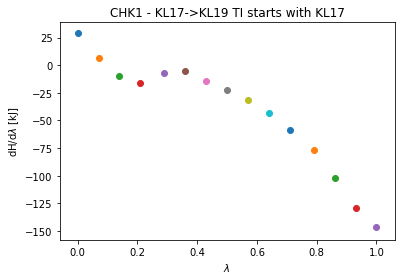

In [56]:
stats_start_KL17 = out_stats
name = "TI_KL17_KL19_start_KL17_water"

sorted_gen = sorted(stats_start_KL17, key=lambda x: stats_start_KL17[x]["x"])

for ind, key in enumerate(sorted_gen):
    val = stats_start_KL17[key]
    plt.scatter(x=val["x"], y=val["mean"])
    plt.errorbar(x=val["x"], y=val["mean"], yerr=val["err_estm"], label=key, )
plt.title("CHK1 - KL17->KL19 TI starts with KL17")
plt.ylabel("dH/d$\lambda$ [kJ]")
plt.xlabel("$\lambda$")
plt.savefig("./"+name+".png")

integral_mean = integrate.simps(x=[stats_start_KL17[key]["x"] for key in sorted_gen], y=[stats_start_KL17[key]["mean"] for key in sorted_gen])
integral_std = integrate.simps(x=[stats_start_KL17[key]["x"] for key in sorted_gen], y=[stats_start_KL17[key]["err_estm"] for key in sorted_gen])

print("dF:\t", integral_mean, "+-",integral_std)


dF:	 -40.56055553744672 +- 0.45361114979744044


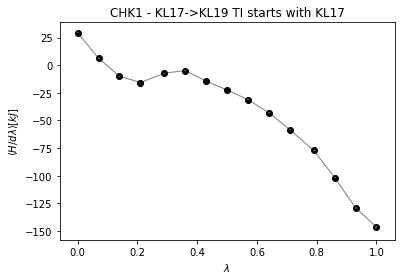

In [65]:
stats_start_KL17 = out_stats
sorted_gen = sorted(stats_start_KL17, key=lambda x: stats_start_KL17[x]["x"])
name = "TI_KL17_KL19_start_KL17_water"

x = []
y =[]
for ind, key in enumerate(sorted_gen):
    val = stats_start_KL17[key]
    x.append(val["x"],)
    y.append(val["mean"])
    plt.scatter(x=val["x"], y=val["mean"], c="k")
    plt.errorbar(x=val["x"], y=val["mean"], yerr=val["err_estm"], label=key, )
    
plt.plot(x, y, lw=1, c="grey", zorder=-1)
plt.title("CHK1 - KL17->KL19 TI starts with KL17")
plt.ylabel("$ \langle{ H/d\lambda} \\rangle  [kJ]$")
plt.xlabel("$\lambda$")
plt.savefig("./"+name+".png")

integral_mean = integrate.simps(x=[stats_start_KL17[key]["x"] for key in sorted_gen], y=[stats_start_KL17[key]["mean"] for key in sorted_gen])
integral_std = integrate.simps(x=[stats_start_KL17[key]["x"] for key in sorted_gen], y=[stats_start_KL17[key]["err_estm"] for key in sorted_gen])

print("dF:\t", integral_mean, "+-",integral_std)


0.0	40
0.07	40
0.14	40
0.21	40
0.29	40
0.36	40
0.43	40
0.5	40
0.57	40
0.64	40
0.71	40
0.79	40
0.86	40
0.93	40
1.0	40


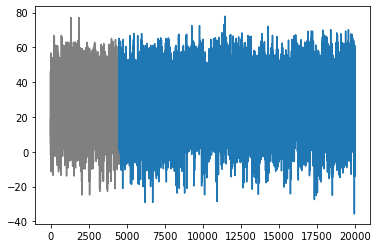

(array([    0. ,     0.3,     0.6, ..., 20003.1, 20003.4, 20003.7]), array([1, 1, 1, ..., 1, 1, 1]))


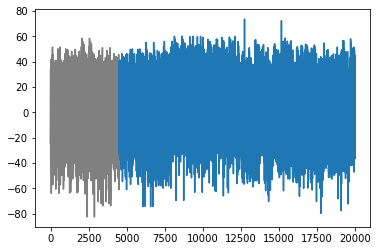

(array([    0. ,     0.3,     0.6, ..., 20003.1, 20003.4, 20003.7]), array([1, 1, 1, ..., 1, 1, 1]))


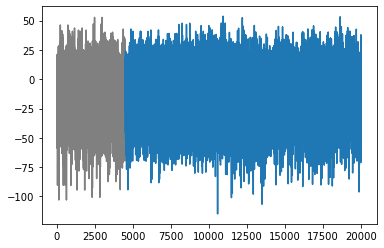

(array([    0. ,     0.3,     0.6, ..., 20003.1, 20003.4, 20003.7]), array([1, 1, 1, ..., 1, 1, 1]))


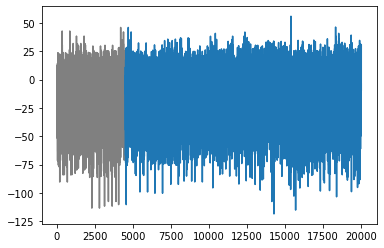

(array([    0. ,     0.3,     0.6, ..., 20003.1, 20003.4, 20003.7]), array([1, 1, 1, ..., 1, 1, 1]))


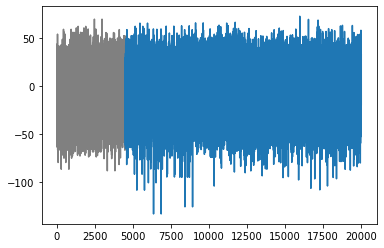

(array([    0. ,     0.3,     0.6, ..., 20003.1, 20003.4, 20003.7]), array([1, 1, 1, ..., 1, 1, 1]))


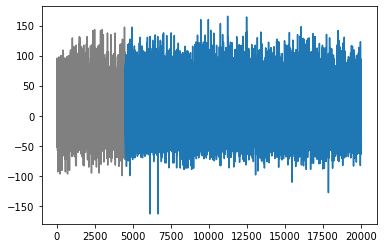

(array([    0. ,     0.3,     0.6, ..., 20003.1, 20003.4, 20003.7]), array([1, 1, 1, ..., 1, 1, 1]))


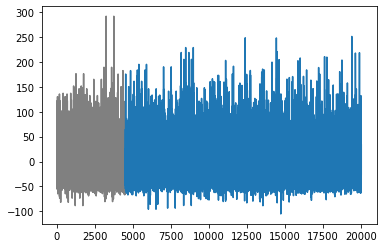

(array([    0. ,     0.3,     0.6, ..., 20003.1, 20003.4, 20003.7]), array([1, 1, 1, ..., 1, 1, 1]))


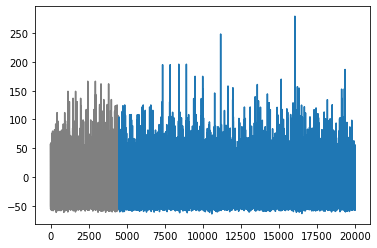

(array([    0. ,     0.3,     0.6, ..., 20003.1, 20003.4, 20003.7]), array([1, 1, 1, ..., 1, 1, 1]))


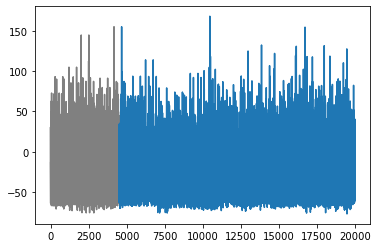

(array([    0. ,     0.3,     0.6, ..., 20003.1, 20003.4, 20003.7]), array([1, 1, 1, ..., 1, 1, 1]))


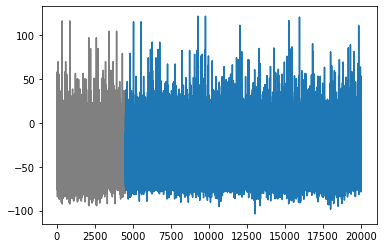

(array([    0. ,     0.3,     0.6, ..., 20003.1, 20003.4, 20003.7]), array([1, 1, 1, ..., 1, 1, 1]))


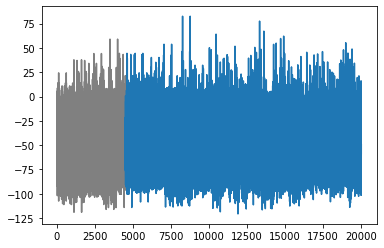

(array([    0. ,     0.3,     0.6, ..., 20003.1, 20003.4, 20003.7]), array([1, 1, 1, ..., 1, 1, 1]))


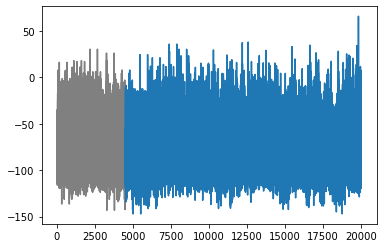

(array([    0. ,     0.3,     0.6, ..., 20003.1, 20003.4, 20003.7]), array([1, 1, 1, ..., 1, 1, 1]))


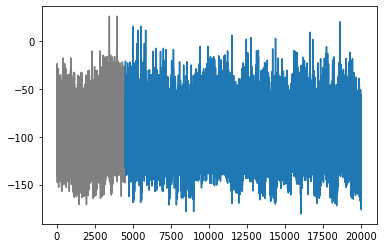

(array([    0. ,     0.3,     0.6, ..., 20003.1, 20003.4, 20003.7]), array([1, 1, 1, ..., 1, 1, 1]))


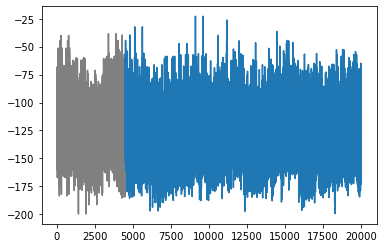

(array([    0. ,     0.3,     0.6, ..., 20003.1, 20003.4, 20003.7]), array([1, 1, 1, ..., 1, 1, 1]))


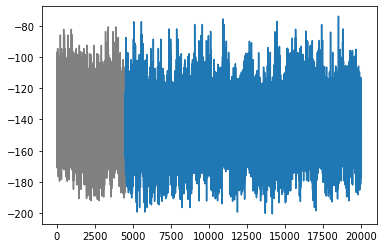

(array([    0. ,     0.3,     0.6, ..., 20003.1, 20003.4, 20003.7]), array([1, 1, 1, ..., 1, 1, 1]))


KeyError: 0.0

In [16]:
#Analysis: Kl17 -> KL19
name = "TI_KL17_KL19_start_KL17"
this_ana_dir = ana_dir+"/start_KL17"

num_l_points = 15
lamda_points = np.round(np.linspace(0,1, num_l_points), 2)
nEquilibrations = 0
nEquilibraitonsSteps=15000

simulation_dir = root_dir+"/simulation_start_KL17"
if(not os.path.exists(this_ana_dir)):
    os.mkdir(this_ana_dir)


ene_files, out_stats = read_out_dvdL(simulation_dir=simulation_dir,in_ene_ana_lib=in_ene_ana_lib,out_dir=this_ana_dir, equilibrations=nEquilibrations)

stats_start_KL17 = calculate_means_stds(ene_files, nEquilibraitonsSteps)

sorted_gen = sorted(out_stats, key=lambda x: stats_start_KL17[x]["x"])

for ind, key in enumerate(sorted_gen):
    val = stats_start_KL17[key]
    plt.scatter(x=val["x"], y=val["mean"],)
    plt.errorbar(x=val["x"], y=val["mean"], yerr=val["std"], label=key, )
plt.title("CHK1 - KL17->KL19 TI starts with KL17")
plt.ylabel("dH/d$\lambda$ [kJ]")
plt.xlabel("$\lambda$")
plt.savefig("./"+name+".png")

integral_mean = integrate.simps(x=[stats_start_KL17[key]["x"] for key in sorted_gen], y=[stats_start_KL17[key]["mean"] for key in sorted_gen])
integral_std = integrate.simps(x=[stats_start_KL17[key]["x"] for key in sorted_gen], y=[stats_start_KL17[key]["std"] for key in sorted_gen])

print("dF:\t", integral_mean, "+-",integral_std)


# KL17->KL19, start KL17

## dF - TI
5ns: -40.56 +- 0.45





In [66]:
#Analysis: Kl19 -> KL17
name = "TI_KL17_KL19_start_KL19_water"
this_ana_dir = ana_dir+"/start_KL19"
simulation_dir = root_dir+"/simulation_start_KL19"


num_l_points = 10
lamda_points = np.round(np.linspace(0,1, num_l_points), 2)
nEquilibrations = 0
nEquilibraitonsSteps=15000

    
if(not os.path.exists(this_ana_dir)):
    os.mkdir(this_ana_dir)


ene_files, out_stats = read_out_dvdL(simulation_dir=simulation_dir,in_ene_ana_lib=in_ene_ana_lib,out_dir=this_ana_dir, equilibrations=nEquilibrations)


0.0	40
0.11	40
0.22	40
0.33	40
0.44	40
0.56	40
0.67	40
0.78	40
0.89	40
1.0	40


dF:	 -40.56055553744672 +- 0.45361114979744044


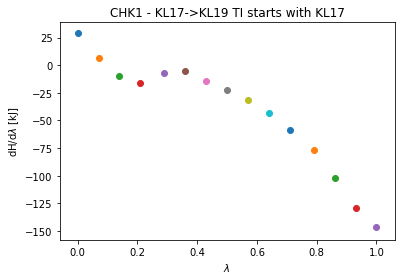

In [58]:
stats_start_KL19 = out_stats
sorted_gen = sorted(stats_start_KL19, key=lambda x: stats_start_KL19[x]["x"])

for ind, key in enumerate(sorted_gen):
    val = stats_start_KL19[key]
    plt.scatter(x=val["x"], y=val["mean"])
    plt.errorbar(x=val["x"], y=val["mean"], yerr=val["err_estm"], label=key, )
plt.title("CHK1 - KL17->KL19 TI starts with KL17")
plt.ylabel("dH/d$\lambda$ [kJ]")
plt.xlabel("$\lambda$")
plt.savefig("./"+name+".png")

integral_mean = integrate.simps(x=[stats_start_KL19[key]["x"] for key in sorted_gen], y=[stats_start_KL19[key]["mean"] for key in sorted_gen])
integral_std = integrate.simps(x=[stats_start_KL19[key]["x"] for key in sorted_gen], y=[stats_start_KL19[key]["err_estm"] for key in sorted_gen])

print("dF:\t", integral_mean, "+-",integral_std)


dF:	 -40.55906430993181 +- 0.4168200873768939


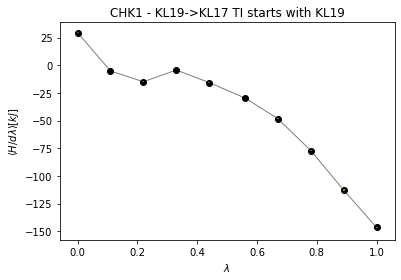

In [67]:
stats_start_KL19 = out_stats
sorted_gen = sorted(stats_start_KL19, key=lambda x: stats_start_KL19[x]["x"])
name = "TI_KL17_KL19_start_KL19_water"

x = []
y =[]
for ind, key in enumerate(sorted_gen):
    val = stats_start_KL19[key]
    x.append(val["x"],)
    y.append(val["mean"])
    plt.scatter(x=val["x"], y=val["mean"], c="k")
    plt.errorbar(x=val["x"], y=val["mean"], yerr=val["err_estm"], label=key, )
    
plt.plot(x, y, lw=1, c="grey", zorder=-1)
plt.title("CHK1 - KL19->KL17 TI starts with KL19")
plt.ylabel("$ \langle{ H/d\lambda} \\rangle  [kJ]$")
plt.xlabel("$\lambda$")
plt.savefig("./"+name+".png")

integral_mean = integrate.simps(x=[stats_start_KL19[key]["x"] for key in sorted_gen], y=[stats_start_KL19[key]["mean"] for key in sorted_gen])
integral_std = integrate.simps(x=[stats_start_KL19[key]["x"] for key in sorted_gen], y=[stats_start_KL19[key]["err_estm"] for key in sorted_gen])

print("dF:\t", integral_mean, "+-",integral_std)


0.0	40
0.11	40
0.22	40
0.33	40
0.44	40
0.56	40
0.67	40
0.78	40
0.89	40
1.0	40


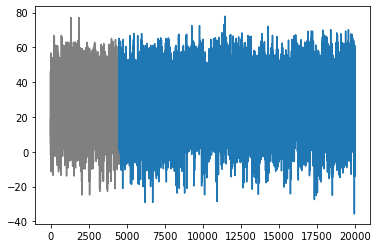

(array([    0. ,     0.3,     0.6, ..., 20003.1, 20003.4, 20003.7]), array([1, 1, 1, ..., 1, 1, 1]))


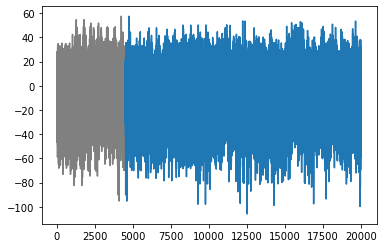

(array([    0. ,     0.3,     0.6, ..., 20003.1, 20003.4, 20003.7]), array([1, 1, 1, ..., 1, 1, 1]))


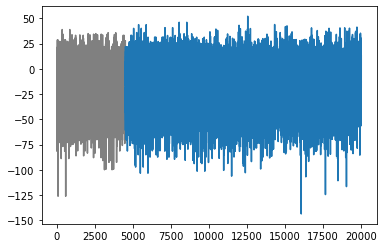

(array([    0. ,     0.3,     0.6, ..., 20003.1, 20003.4, 20003.7]), array([1, 1, 1, ..., 1, 1, 1]))


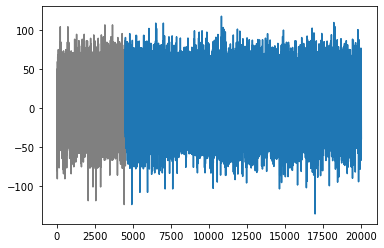

(array([    0. ,     0.3,     0.6, ..., 20003.1, 20003.4, 20003.7]), array([1, 1, 1, ..., 1, 1, 1]))


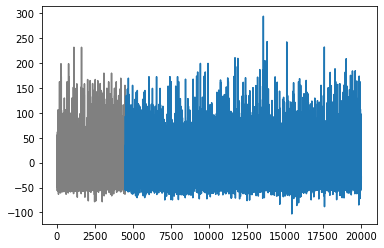

(array([    0. ,     0.3,     0.6, ..., 20003.1, 20003.4, 20003.7]), array([1, 1, 1, ..., 1, 1, 1]))


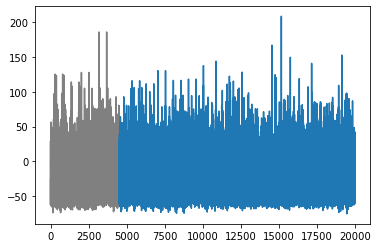

(array([    0. ,     0.3,     0.6, ..., 20003.1, 20003.4, 20003.7]), array([1, 1, 1, ..., 1, 1, 1]))


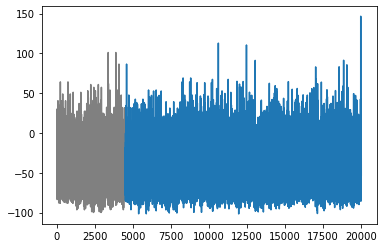

(array([    0. ,     0.3,     0.6, ..., 20003.1, 20003.4, 20003.7]), array([1, 1, 1, ..., 1, 1, 1]))


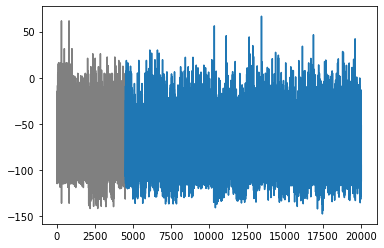

(array([    0. ,     0.3,     0.6, ..., 20003.1, 20003.4, 20003.7]), array([1, 1, 1, ..., 1, 1, 1]))


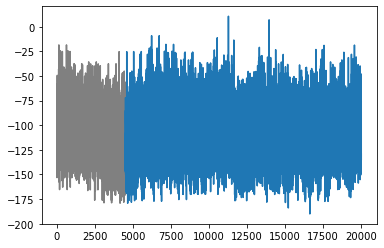

(array([    0. ,     0.3,     0.6, ..., 20003.1, 20003.4, 20003.7]), array([1, 1, 1, ..., 1, 1, 1]))


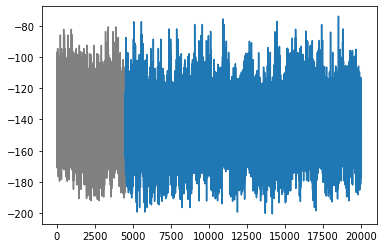

(array([    0. ,     0.3,     0.6, ..., 20003.1, 20003.4, 20003.7]), array([1, 1, 1, ..., 1, 1, 1]))
['L_0.0_dvdl', 'L_0.11_dvdl', 'L_0.22_dvdl', 'L_0.33_dvdl', 'L_0.44_dvdl', 'L_0.56_dvdl', 'L_0.67_dvdl', 'L_0.78_dvdl', 'L_0.89_dvdl', 'L_1.0_dvdl']

dF:	 -40.705113187778636 +- 21.900977630447652


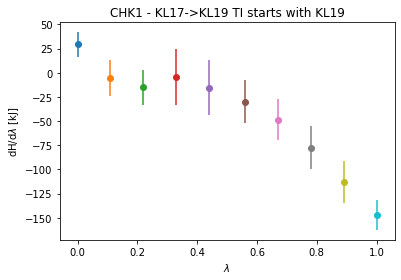

In [19]:
#Analysis: Kl19 -> KL17
name = "TI_KL17_KL19_start_KL19"
this_ana_dir = ana_dir+"/start_KL19"
simulation_dir = root_dir+"/simulation_start_KL19"


num_l_points = 10
lamda_points = np.round(np.linspace(0,1, num_l_points), 2)
nEquilibrations = 0
nEquilibraitonsSteps=15000

    
if(not os.path.exists(this_ana_dir)):
    os.mkdir(this_ana_dir)


ene_files, out_stats = read_out_dvdL(simulation_dir=simulation_dir,in_ene_ana_lib=in_ene_ana_lib,out_dir=this_ana_dir, equilibrations=nEquilibrations)

stats_start_KL19 = calculate_means_stds(ene_files, nEquilibraitonsSteps)

sorted_gen = sorted(stats_start_KL19, key=lambda x: stats_start_KL19[x]["x"])
print(sorted_gen)
print()

for ind, key in enumerate(sorted_gen):
    val = stats_start_KL19[key]
    plt.scatter(x=val["x"], y=val["mean"],)
    plt.errorbar(x=val["x"], y=val["mean"], yerr=val["std"], label=key, )
plt.title("CHK1 - KL17->KL19 TI starts with KL19")
plt.ylabel("dH/d$\lambda$ [kJ]")
plt.xlabel("$\lambda$")
plt.savefig("./"+name+".png")

integral_mean = integrate.simps(x=[stats_start_KL19[key]["x"] for key in sorted_gen], y=[stats_start_KL19[key]["mean"] for key in sorted_gen])
integral_std = integrate.simps(x=[stats_start_KL19[key]["x"] for key in sorted_gen], y=[stats_start_KL19[key]["std"] for key in sorted_gen])

print("dF:\t", integral_mean, "+-",integral_std)

# KL17->KL19, start KL19

## dF - TI
5ns: 


## dF - bar:
pybar

U1, U2


